# Hands-on Activity 1.3 | Transportation using Graphs

#### Objective(s):

This activity aims to demonstrate how to solve transportation related problem using Graphs

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to compute the shortest path from source to destination using graphs
* Apply DFS and BFS to compute the shortest path

#### Resources:
* Jupyter Notebook

#### Procedures:

1. Create a Node class

In [ ]:
class Node(object):
    def __init__(self, name):
        """Assumes name is a string"""
        self.name = name
    def getName(self):
        return self.name
    def __str__(self):
        return self.name

2. Create an Edge class

In [ ]:
class Edge(object):
    def __init__(self, src, dest):
        """Assumes src and dest are nodes"""
        self.src = src
        self.dest = dest
    def getSource(self):
        return self.src
    def getDestination(self):
        return self.dest
    def __str__(self):
        return self.src.getName() + '->' + self.dest.getName()

3. Create Digraph class that add nodes and edges

In [ ]:
class Digraph(object):
    """edges is a dict mapping each node to a list of
    its children"""
    def __init__(self):
        self.edges = {}
    def addNode(self, node):
        if node in self.edges:
            raise ValueError('Duplicate node')
        else:
            self.edges[node] = []
    def addEdge(self, edge):
        src = edge.getSource()
        dest = edge.getDestination()
        if not (src in self.edges and dest in self.edges):
            raise ValueError('Node not in graph')
        self.edges[src].append(dest)
    def childrenOf(self, node):
        return self.edges[node]
    def hasNode(self, node):
        return node in self.edges
    def getNode(self, name):
        for n in self.edges:
            if n.getName() == name:
                return n
        raise NameError(name)
    def __str__(self):
        result = ''
        for src in self.edges:
            for dest in self.edges[src]:
                result = result + src.getName() + '->'\
                         + dest.getName() + '\n'
        return result[:-1] #omit final newline

4. Create a Graph class from Digraph class that deifnes the destination and Source

In [ ]:
class Graph(Digraph):
    def addEdge(self, edge):
        Digraph.addEdge(self, edge)
        rev = Edge(edge.getDestination(), edge.getSource())
        Digraph.addEdge(self, rev)

5. Create a buildCityGraph method to add nodes (City) and edges   (source to destination)

In [ ]:
def buildCityGraph(graphType):
    g = graphType()
    for name in ('Boston', 'Providence', 'New York', 'Chicago', 'Denver', 'Phoenix', 'Los Angeles'):
        #Create 7 nodes
        g.addNode(Node(name))
    g.addEdge(Edge(g.getNode('Boston'), g.getNode('Providence')))
    g.addEdge(Edge(g.getNode('Boston'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('Providence'), g.getNode('Boston')))
    g.addEdge(Edge(g.getNode('Providence'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('New York'), g.getNode('Chicago')))
    g.addEdge(Edge(g.getNode('Chicago'), g.getNode('Denver')))
    g.addEdge(Edge(g.getNode('Denver'), g.getNode('Phoenix')))
    g.addEdge(Edge(g.getNode('Denver'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('Los Angeles'), g.getNode('Boston')))
    return g

In [ ]:
def printPath(path):
    """Assumes path is a list of nodes"""
    result = ''
    for i in range(len(path)):
        result = result + str(path[i])
        if i != len(path) - 1:
            result = result + '->'
    return result

6. Create a method to define DFS technique

In [ ]:
def DFS(graph, start, end, path, shortest, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes;
          path and shortest are lists of nodes
       Returns a shortest path from start to end in graph"""
    path = path + [start]
    if toPrint:
        print('Current DFS path:', printPath(path))
    if start == end:
        return path
    for node in graph.childrenOf(start):
        if node not in path: #avoid cycles
            if shortest == None or len(path) < len(shortest):
                newPath = DFS(graph, node, end, path, shortest,
                              toPrint)
                if newPath != None:
                    shortest = newPath
        elif toPrint:
            print('Already visited', node)
    return shortest

7. Define a shortestPath method to return the shortest path from source to destination using DFS

In [ ]:
def shortestPath(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return DFS(graph, start, end, [], None, toPrint)

8. Create a method to test the shortest path method

In [ ]:
def testSP(source, destination):
    g = buildCityGraph(Digraph)
    sp = shortestPath(g, g.getNode(source), g.getNode(destination),
                      toPrint = True)
    if sp != None:
        print('Shortest path from', source, 'to',
              destination, 'is', printPath(sp))
    else:
        print('There is no path from', source, 'to', destination)

9. Execute the testSP method

In [ ]:
testSP('Boston', 'Phoenix')

Current DFS path: Boston
Current DFS path: Boston->Providence
Already visited Boston
Current DFS path: Boston->Providence->New York
Current DFS path: Boston->Providence->New York->Chicago
Current DFS path: Boston->Providence->New York->Chicago->Denver
Current DFS path: Boston->Providence->New York->Chicago->Denver->Phoenix
Already visited New York
Current DFS path: Boston->New York
Current DFS path: Boston->New York->Chicago
Current DFS path: Boston->New York->Chicago->Denver
Current DFS path: Boston->New York->Chicago->Denver->Phoenix
Already visited New York
Shortest path from Boston to Phoenix is Boston->New York->Chicago->Denver->Phoenix


##### Question:
    
Describe the DFS method to compute for the shortest path using the given sample codes

DFS method compute its shortest path by traversing all the possible paths from the left side first. For example, in this graph, let's say that I want to go from Marikina to Manila. DFS Method will try to get all the nodes that was connected on its left side, in this case since we will start from Marikina, it will traverse all of the nodes connected to Quezon first before going to Pasig Node. Once all the nodes are explored, it will now include it inside a list and get the size of it, the list with the least size is considered as the shortest path.



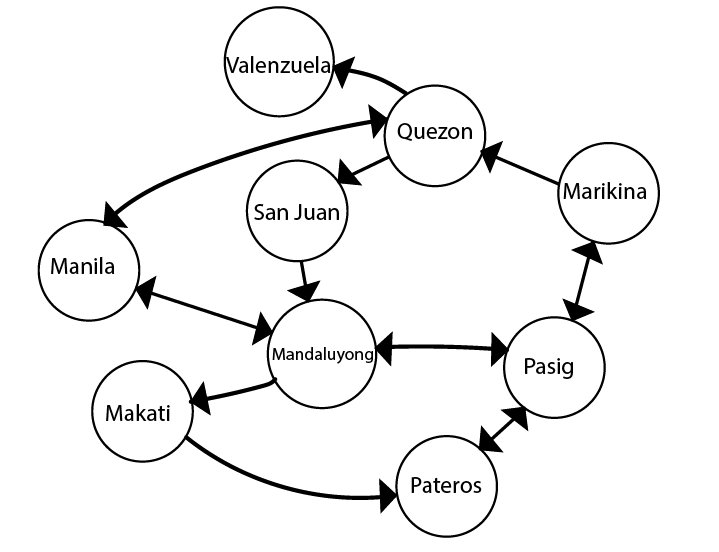


10. Create a method to define BFS technique

In [ ]:
def BFS(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    initPath = [start]
    pathQueue = [initPath]
    while len(pathQueue) != 0:
        #Get and remove oldest element in pathQueue
        tmpPath = pathQueue.pop(0)
        if toPrint:
            print('Current BFS path:', printPath(tmpPath))
        lastNode = tmpPath[-1]
        if lastNode == end:
            return tmpPath
        for nextNode in graph.childrenOf(lastNode):
            if nextNode not in tmpPath:
                newPath = tmpPath + [nextNode]
                pathQueue.append(newPath)
    return None

11. Define a shortestPath method to return the shortest path from source to destination using DFS

In [ ]:
def shortestPath(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return BFS(graph, start, end, toPrint)

12. Execute the testSP method

In [ ]:
testSP('Boston', 'Phoenix')

Current BFS path: Boston
Current BFS path: Boston->Providence
Current BFS path: Boston->New York
Current BFS path: Boston->Providence->New York
Current BFS path: Boston->New York->Chicago
Current BFS path: Boston->Providence->New York->Chicago
Current BFS path: Boston->New York->Chicago->Denver
Current BFS path: Boston->Providence->New York->Chicago->Denver
Current BFS path: Boston->New York->Chicago->Denver->Phoenix
Shortest path from Boston to Phoenix is Boston->New York->Chicago->Denver->Phoenix


BFS Method of computation for the shortest path

BFS Method is a little bit different. In BFS method, it will traverse all of its children nodes first, then it will traverse through its grand children nodes and so on until it reaches its destination. In this case, after traversing to Quezon node, instead of traversing to the Quezon's children node of Quezon, it will traverse to its own children node first which is Pasig Node.
BFS will continue to traverse until it reaches its destination.

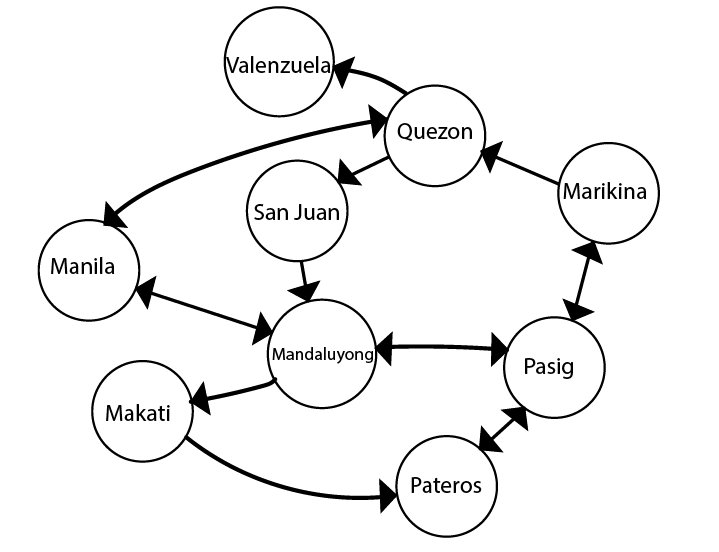


#### Supplementary Activitiy
* Use a specific location or city to solve transportation using graph
* Use DFS and BFS methods to compute the shortest path
* Display the shortest path from source to destination using DFS and BFS
* Differentiate the performance of DFS from BFS

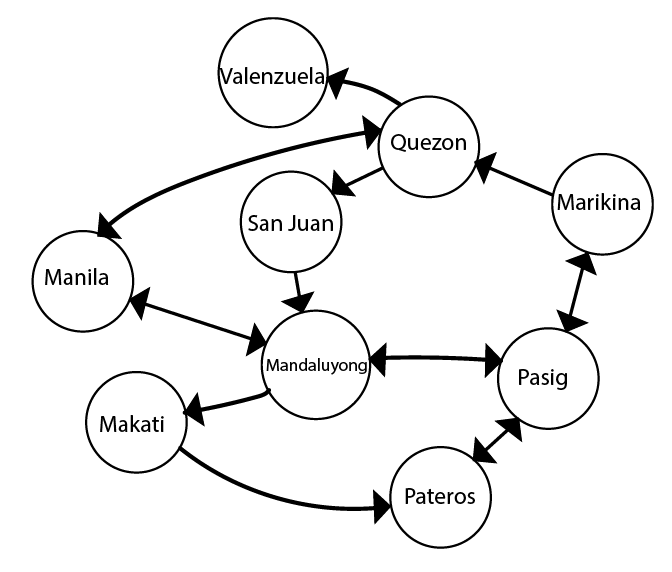

Above is a graph of place that is connected to each other. Each vertex is connected by an edge with an arrow which means that you can go to that node from that node. For example (Pateros has 2 edges, 1 from Makait and 1 from Pasig, if you want to go to Pateros, you have to get to Makait or Pasig first).


Driver Man is a delivery man who travels for most of the places in the NCR (National Capital Region). Driver Man wants to identify which path would be the shortest so that Driver Man can save money on gasoline. However, due to maintenace of highways and roadways, some places doesn't have it's way back (For example, you can't return if you go to Valenzuela since there's is path to leave that node). Driver Man wants to deliver from Marikina to Manila using the shortest path, and want to return to Marikina from Manila using the shortest path also. The code below will show which cities is the best option for him to get the shortest path possible in order to save money on gasoline

# **DFS METHOD**

In [ ]:
class Node(object):
    def __init__(self, name):
        self.name = name #constructor for the node
    def getName(self):
        return self.name #naming the node
    def __str__(self):
        return self.name #returning the name of the node

class Edge(object):
    def __init__(self, src, dest):
        self.src = src #constructor for the source node / starting location
        self.dest = dest #constructor for the destination node / end location
    def getSource(self):
        return self.src
    def getDestination(self):
        return self.dest
    def __str__(self):
        return self.src.getName() + '->' + self.dest.getName()

class Digraph(object):
    def __init__(self):
        self.edges = {}
    def addNode(self, node): # adding nodes to the graph
        if node in self.edges:
            raise ValueError('Duplicate node')
        else:
            self.edges[node] = []
    def addEdge(self, edge): #adding a path through the nodes
        src = edge.getSource()
        dest = edge.getDestination()
        if not (src in self.edges and dest in self.edges):
            raise ValueError('Location not in graph')
        self.edges[src].append(dest)
    def childrenOf(self, node): # identifying the parent node
        return self.edges[node]
    def hasNode(self, node): # identifying if the edge has a node connected to it
        return node in self.edges
    def getNode(self, name): # getting all the nodes connected to the edge
        for n in self.edges:
            if n.getName() == name:
                return n
        raise NameError(name)
    def __str__(self):
        result = ''
        for src in self.edges:
            for dest in self.edges[src]:
                result = result + src.getName() + '->'\
                         + dest.getName() + '\n'
        return result[:-1]

class Graph(Digraph):
    def addEdge(self, edge): # adding a one way direction / directed route to the nodes
        Digraph.addEdge(self, edge)
        rev = Edge(edge.getDestination(), edge.getSource())
        Digraph.addEdge(self, rev)

def buildCityGraph(graphType): # connection of the nodes
    g = graphType()
    for name in ('Marikina', 'Pasig', 'Quezon', 'Pateros', 'Valenzuela', 'San Juan', 'Mandaluyong', 'Manila', 'Makati'):
        g.addNode(Node(name))
    g.addEdge(Edge(g.getNode('Marikina'), g.getNode('Quezon')))
    g.addEdge(Edge(g.getNode('Marikina'), g.getNode('Pasig')))
    g.addEdge(Edge(g.getNode('Pasig'), g.getNode('Marikina')))
    g.addEdge(Edge(g.getNode('Pasig'), g.getNode('Mandaluyong')))
    g.addEdge(Edge(g.getNode('Pasig'), g.getNode('Pateros')))
    g.addEdge(Edge(g.getNode('Quezon'), g.getNode('Valenzuela')))
    g.addEdge(Edge(g.getNode('Quezon'), g.getNode('Manila')))
    g.addEdge(Edge(g.getNode('Quezon'), g.getNode('San Juan')))
    g.addEdge(Edge(g.getNode('Pateros'), g.getNode('Pasig')))
    g.addEdge(Edge(g.getNode('San Juan'), g.getNode('Mandaluyong')))
    g.addEdge(Edge(g.getNode('Mandaluyong'), g.getNode('Manila')))
    g.addEdge(Edge(g.getNode('Mandaluyong'), g.getNode('Pasig')))
    g.addEdge(Edge(g.getNode('Mandaluyong'), g.getNode('Makati')))
    g.addEdge(Edge(g.getNode('Manila'), g.getNode('Quezon')))
    g.addEdge(Edge(g.getNode('Manila'), g.getNode('Mandaluyong')))
    g.addEdge(Edge(g.getNode('Makati'), g.getNode('Pateros')))
    return g

def printPath(path):
    result = ''
    for i in range(len(path)):
        result = result + str(path[i])
        if i != len(path) - 1:
            result = result + '->'
    return result

def DFS(graph, start, end, path, shortest, toPrint = False): #searching method
    path = path + [start]
    if toPrint:
        print('Current DFS path:', printPath(path))
    if start == end: #if the starting point and the destionation is same, return the path
        return path
    for node in graph.childrenOf(start):
        if node not in path: #avoid cycles
            if shortest == None or len(path) < len(shortest): #chaging the value of the newPath if its length is less
                newPath = DFS(graph, node, end, path, shortest,
                              toPrint)
                if newPath != None:
                    shortest = newPath
        elif toPrint:
            print('Already visited', node)
    return shortest


def shortestPath(graph, start, end, toPrint = False):
    return DFS(graph, start, end, [], None, toPrint)


def testSP(source, destination):
    g = buildCityGraph(Digraph) #connection of the nodes
    sp = shortestPath(g, g.getNode(source), g.getNode(destination), #identifying the fastest route
                      toPrint = True)
    if sp != None:
        print('Shortest path from', source, 'to',
              destination, 'is', printPath(sp))
    else:
        print('There is no path from', source, 'to', destination)


testSP('Marikina','Manila')
print('-'*100)
print("Now returning to Marikina from Manila")
print('-'*100)
testSP('Manila', 'Marikina')



Current DFS path: Marikina
Current DFS path: Marikina->Quezon
Current DFS path: Marikina->Quezon->Valenzuela
Current DFS path: Marikina->Quezon->Manila
Current DFS path: Marikina->Quezon->San Juan
Current DFS path: Marikina->Pasig
Already visited Marikina
Current DFS path: Marikina->Pasig->Mandaluyong
Already visited Pasig
Current DFS path: Marikina->Pasig->Pateros
Already visited Pasig
Shortest path from Marikina to Manila is Marikina->Quezon->Manila
----------------------------------------------------------------------------------------------------
Now returning to Marikina from Manila
----------------------------------------------------------------------------------------------------
Current DFS path: Manila
Current DFS path: Manila->Quezon
Current DFS path: Manila->Quezon->Valenzuela
Already visited Manila
Current DFS path: Manila->Quezon->San Juan
Current DFS path: Manila->Quezon->San Juan->Mandaluyong
Already visited Manila
Current DFS path: Manila->Quezon->San Juan->Mandaluyong-

## **BFS Method**

In [ ]:
class Node(object):
    def __init__(self, name):
        self.name = name #constructor for the node
    def getName(self):
        return self.name #naming the node
    def __str__(self):
        return self.name #returning the name of the node

class Edge(object):
    def __init__(self, src, dest):
        self.src = src #constructor for the source node / starting location
        self.dest = dest #constructor for the destionation node / end location
    def getSource(self):
        return self.src
    def getDestination(self):
        return self.dest
    def __str__(self):
        return self.src.getName() + '->' + self.dest.getName()

class Digraph(object):
    def __init__(self):
        self.edges = {}
    def addNode(self, node):
        if node in self.edges:
            raise ValueError('Duplicate node')
        else:
            self.edges[node] = []
    def addEdge(self, edge):
        src = edge.getSource()
        dest = edge.getDestination()
        if not (src in self.edges and dest in self.edges):
            raise ValueError('Location not in graph')
        self.edges[src].append(dest)
    def childrenOf(self, node):
        return self.edges[node]
    def hasNode(self, node):
        return node in self.edges
    def getNode(self, name):
        for n in self.edges:
            if n.getName() == name:
                return n
        raise NameError(name)
    def __str__(self):
        result = ''
        for src in self.edges:
            for dest in self.edges[src]:
                result = result + src.getName() + '->'\
                         + dest.getName() + '\n'
        return result[:-1]

class Graph(Digraph):
    def addEdge(self, edge):
        Digraph.addEdge(self, edge)
        rev = Edge(edge.getDestination(), edge.getSource())
        Digraph.addEdge(self, rev)

def buildCityGraph(graphType): # connection of the nodes
    g = graphType()
    for name in ('Marikina', 'Pasig', 'Quezon', 'Pateros', 'Valenzuela', 'San Juan', 'Mandaluyong', 'Manila', 'Makati'):
        g.addNode(Node(name))
    g.addEdge(Edge(g.getNode('Marikina'), g.getNode('Quezon')))
    g.addEdge(Edge(g.getNode('Marikina'), g.getNode('Pasig')))
    g.addEdge(Edge(g.getNode('Pasig'), g.getNode('Marikina')))
    g.addEdge(Edge(g.getNode('Pasig'), g.getNode('Mandaluyong')))
    g.addEdge(Edge(g.getNode('Pasig'), g.getNode('Pateros')))
    g.addEdge(Edge(g.getNode('Quezon'), g.getNode('Valenzuela')))
    g.addEdge(Edge(g.getNode('Quezon'), g.getNode('Manila')))
    g.addEdge(Edge(g.getNode('Quezon'), g.getNode('San Juan')))
    g.addEdge(Edge(g.getNode('Pateros'), g.getNode('Pasig')))
    g.addEdge(Edge(g.getNode('San Juan'), g.getNode('Mandaluyong')))
    g.addEdge(Edge(g.getNode('Mandaluyong'), g.getNode('Manila')))
    g.addEdge(Edge(g.getNode('Mandaluyong'), g.getNode('Pasig')))
    g.addEdge(Edge(g.getNode('Mandaluyong'), g.getNode('Makati')))
    g.addEdge(Edge(g.getNode('Manila'), g.getNode('Quezon')))
    g.addEdge(Edge(g.getNode('Manila'), g.getNode('Mandaluyong')))
    g.addEdge(Edge(g.getNode('Makati'), g.getNode('Pateros')))
    return g

def printPath(path):
    result = ''
    for i in range(len(path)):
        result = result + str(path[i])
        if i != len(path) - 1:
            result = result + '->'
    return result

def BFS(graph, start, end, toPrint = False):
    initPath = [start]
    pathQueue = [initPath]
    while len(pathQueue) != 0:
        #Get and remove oldest element in pathQueue
        tmpPath = pathQueue.pop(0)
        if toPrint:
            print('Current BFS path:', printPath(tmpPath))
        lastNode = tmpPath[-1]
        if lastNode == end:
            return tmpPath
        for nextNode in graph.childrenOf(lastNode):
            if nextNode not in tmpPath:
                newPath = tmpPath + [nextNode]
                pathQueue.append(newPath)
    return None


def shortestPath(graph, start, end, toPrint = False):
    return BFS(graph, start, end, toPrint)


def testSP(source, destination):
    g = buildCityGraph(Digraph)
    sp = shortestPath(g, g.getNode(source), g.getNode(destination),
                      toPrint = True)
    if sp != None:
        print('Shortest path from', source, 'to',
              destination, 'is', printPath(sp))
    else:
        print('There is no path from', source, 'to', destination)


testSP('Marikina','Manila')
print('-'*100)
testSP('Manila', 'Marikina')



Current BFS path: Marikina
Current BFS path: Marikina->Quezon
Current BFS path: Marikina->Pasig
Current BFS path: Marikina->Quezon->Valenzuela
Current BFS path: Marikina->Quezon->Manila
Shortest path from Marikina to Manila is Marikina->Quezon->Manila
----------------------------------------------------------------------------------------------------
Current BFS path: Manila
Current BFS path: Manila->Quezon
Current BFS path: Manila->Mandaluyong
Current BFS path: Manila->Quezon->Valenzuela
Current BFS path: Manila->Quezon->San Juan
Current BFS path: Manila->Mandaluyong->Pasig
Current BFS path: Manila->Mandaluyong->Makati
Current BFS path: Manila->Quezon->San Juan->Mandaluyong
Current BFS path: Manila->Mandaluyong->Pasig->Marikina
Shortest path from Manila to Marikina is Manila->Mandaluyong->Pasig->Marikina


#**Conclusion**

DFS Method way of computing for the shortest path might take longer than the BFS Method. The difference between them is that the DFS Method compiles all the possibile route from your starting point going to your destination, we can say that the DFS Method can provide the best solution since it is the comparison of all the possible solutions/route. The BFS Method might be faster when compared to DFS Method but it does not provide the best solution, it only provides the temporary best solution because in BFS Method, once it reaches its destionation it will immediately return it.